In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

In [9]:
def cordic(mag,angle,res):
    # resolution (bit)
    n = res
    # make the LUT of the atan(2^-i) in RAD
    lut = [np.arctan(2**-i) for i in range(n-1)]
    
    
    if angle <= -pi/2.0:
        k = 1
        angle = angle+pi
    elif angle >= pi/2.0:
        k = -1
        angle = angle-pi
    else:
        k = 1

    z = np.ones(n)*angle
    x = np.zeros(n)
    y = np.zeros(n)
    
    x[0] = mag
    for i in range(n-1):
        if z[i] < 0:
            x[i+1] = x[i] + y[i]/2**i
            y[i+1] = y[i] - x[i]/2**i
            z[i+1] = z[i] + lut[i]
        else:
            x[i+1] = x[i] - y[i]/2**i
            y[i+1] = y[i] + x[i]/2**i
            z[i+1] = z[i] - lut[i]
    if(k > 0):
        sin = x[-1]
        cos = -y[-1]
    else:
        sin = -x[-1]
        cos = y[-1]
    return sin,cos

In [11]:
import pandas as pd

In [14]:
plt.style.use('bmh')
t = np.linspace(0,0.02,1000)
angle = 2*pi*50*t-pi/2

df = pd.DataFrame()
df['t'] = t
df['angle'] = angle

for res in range(3,15):
    sin = []
    cos = []
    for ang in angle:
        sin.append(cordic(1,ang,res)[0])
        cos.append(cordic(1,ang,res)[1])
    df[f'sin {res}'] = sin
    df[f'cos {res}'] = cos

In [15]:
df.head()

,t,angle,sin 3,cos 3,sin 4,cos 4,sin 5,cos 5,sin 6,cos 6,...,sin 10,cos 10,sin 11,cos 11,sin 12,cos 12,sin 13,cos 13,sin 14,cos 14
0,0.00000,-1.570796,0.5,-1.5,0.125,-1.625,-0.078125,-1.640625,0.024414,-1.645508,...,0.005147,-1.646748,0.001931,-1.646758,0.000323,-1.646760,-0.000481,-1.646760,-0.000079,-1.646760
1,0.00002,-1.564507,0.5,1.5,0.125,1.625,-0.078125,1.640625,0.024414,1.645508,...,0.005147,1.646748,0.008364,1.646738,0.009972,1.646730,0.010776,1.646725,0.010374,1.646728
2,0.00004,-1.558217,0.5,1.5,0.125,1.625,-0.078125,1.640625,0.024414,1.645508,...,0.018012,1.646658,0.021228,1.646622,0.019620,1.646643,0.020424,1.646634,0.020826,1.646629
3,0.00006,-1.551928,0.5,1.5,0.125,1.625,-0.078125,1.640625,0.024414,1.645508,...,0.030847,1.646467,0.034063,1.646407,0.032455,1.646440,0.031651,1.646456,0.031249,1.646464
4,0.00008,-1.545638,0.5,1.5,0.125,1.625,-0.078125,1.640625,0.024414,1.645508,...,0.043709,1.646176,0.040494,1.646261,0.042102,1.646222,0.041298,1.646242,0.041700,1.646232


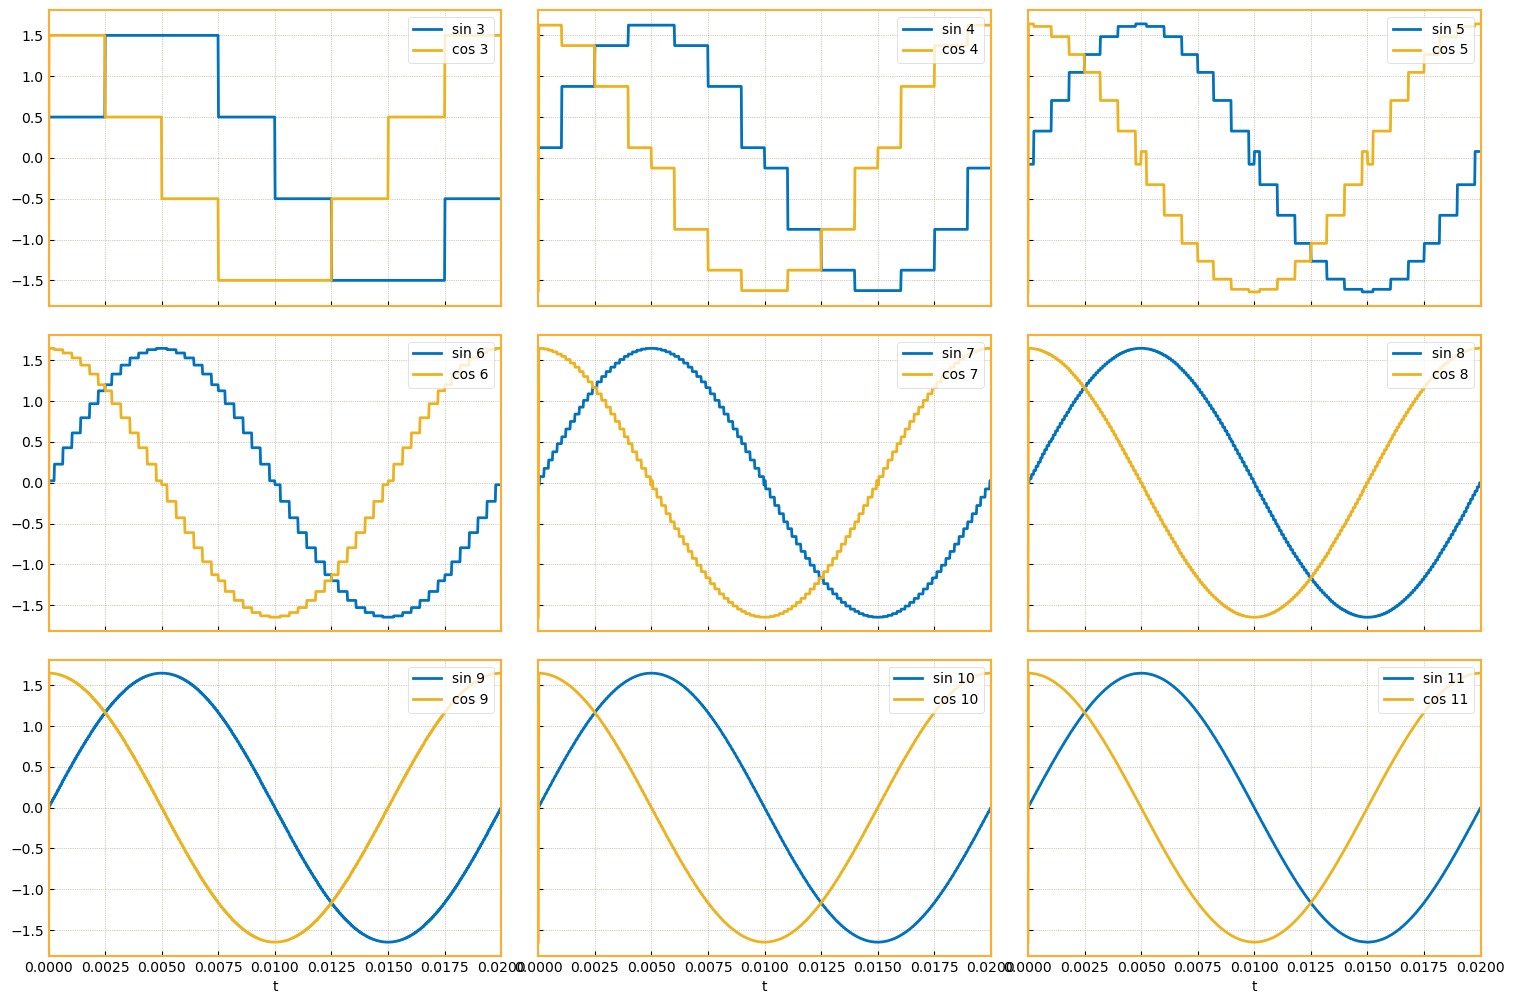

In [41]:
fig,p = plt.subplots(3,3,sharex=True,sharey=True)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout()
for j in range(3):
    for i in range(3):
        df.plot(ax=p[j][i],x='t',y=[f'sin {(i+(j+1)*3)}',f'cos {(i+(j+1)*3)}'],xlim=(0,0.02),linewidth=2)
        p[j][i].legend(loc='upper right')
        
fig.savefig('cordic_iterations.png')

In [63]:
Ts = 1e-6
t = np.arange(0,0.02,Ts)
angle = (pi*signal.sawtooth(2*pi*300.*t)+pi)/6
angle_full = pi*signal.sawtooth(2*pi*50*t)+pi

In [66]:
T1 = Ts*angle*sin(pi/3-angle)/sin(pi/3)
T2 = Ts*angle*sin(angle)/sin(pi/3)
T0 = Ts-(T1+T2)

[None, None]

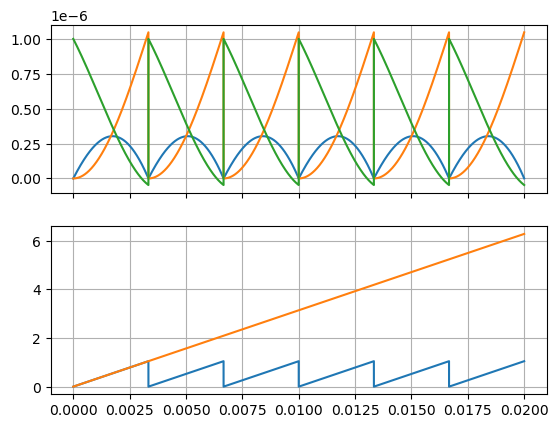

In [68]:
fig,p=plt.subplots(2,sharex=True)
p[0].plot(t,T1)
p[0].plot(t,T2)
p[0].plot(t,T0)
p[1].plot(t,angle)
p[1].plot(t,angle_full)

[ax.grid() for ax in p]